**Máximos y mínimos**
-
---

Para definir máximos y mínimos de una función se busca los puntos en los cuales la pendiente es igual a 0.

$$ f'(x) = 0 $$

In [1]:
import math
from math import *
from scipy import optimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#### **Ejemplo**
$$ f(x) = -\frac{1}{1000}x^3 + x $$
 

In [2]:
expr = "-(1/1000)*x**3+x"

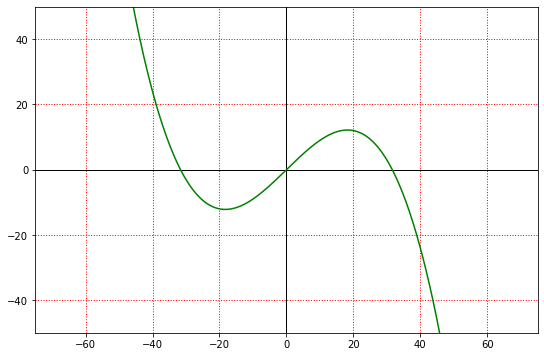

In [24]:
def f(x):
    return eval(expr)

x = np.linspace(-100,100,num=1000)
y = f(x)
fig, ax = plt.subplots()
ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(x, y, color='g')
plt.xlim(-75,75)
plt.ylim(-50,50)
plt.rcParams["figure.figsize"]=9,6
plt.rcParams["figure.dpi"]=72
plt.show()


+ Derivada de $f(x)$
$$ -\frac{3}{1000}x^2 + 1 $$

In [25]:
# Derivación
def deriv(expr):
    return sp.Derivative(expr, evaluate=True)
f_d = deriv(expr)
f_d

1 - 3*x**2/1000

+ Igualación a $0$
$$f'(x) = 0$$
$$-\frac{3}{1000}x^2 + 1 = 0$$

In [56]:
# Derivando la función y asignandola a una funcion f_1
f_1 = eval('lambda x:' + ' ' + str(deriv(expr)))

In [121]:
## Función para hallar ceros o raíces de una función
def zeros(func, x):
    roots = []
    y = func(x)
    s = np.sign(y)
    for i,v in enumerate(y):        
        if (i < len(y)-1) and (s[i] + s[i+1] == 0):
            u = optimize.brentq(func, x[i], x[i+1])
            roots.append(u)
    return roots


In [124]:
f_1_zeros = zeros(f_1, x)
f_max_min = []
for i in f_1_zeros:
    print('cero en:', '{:>15}'.format(round(i, 2)))
    print('┗con f(x) en ', '{:>10}'.format(round(f(i), 2)))
    f_max_min.append(f(i))

cero en:          -18.26
┗con f(x) en      -12.17
cero en:           18.26
┗con f(x) en       12.17


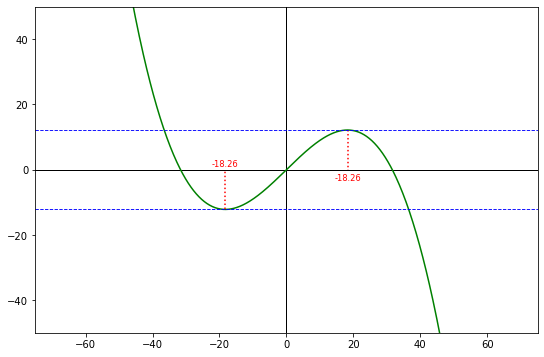

In [180]:
# Graficando las rectas en los ceros
def f(x):
    return eval(expr)

x = np.linspace(-100,100,num=1000)
y = f(x)
fig, ax = plt.subplots()
# ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(x, y, color='g')
plt.xlim(-75,75)
plt.ylim(-50,50)

### Graficar lineas verticales en raices
x1, y1 = [f_1_zeros[1], f_1_zeros[1]], [f_max_min[1], 0]
ax.plot(x1, y1, color='red', linewidth='1.5', ls=':')
x1, y1 = [f_1_zeros[0], f_1_zeros[0]], [f_max_min[0], 0]
ax.plot(x1, y1, color='red', linewidth='1.5', ls=':')

### Graficar lineas horizontales en los valores f(x) de las raices
for i in f_max_min:
    ax.axhline(y=i, color='blue', linewidth='0.9', ls='--')

ax.text(f_1_zeros[0], 1, '-18.26', size='small', ha='center', color ='red' )
ax.text(f_1_zeros[1], -1,'-18.26', size='small', ha='center', va ='top' , color='red')


plt.rcParams["figure.figsize"]=9,6
plt.rcParams["figure.dpi"]=72
plt.show()


In [101]:
def g(x):
    return -(x-3)**3 + x**2 -8
res = optimize.root_scalar(g, bracket=[-3,10])
res

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 6.064434533796576